# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.

I chose to use the first approach as th model I trained in for lab3 was producing satisfactory results and achieved 100% accuracy. So I wanted to use a diverse and clear set of training and validation pictures to test the model.
## *Controlled Envirnomet*
- used my lab2 code from `lab2_image_capture_gui.py` to capture new images with:
  - a neural white background
  - identaical lighting conditions
  - same camera angle
  - with only the hand in the frame
- used my lab3 code to train the model exactly the same to act as the control for this experiment


# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [4]:
!pip install -q fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [5]:
!pip install -q fastbook
import fastbook
fastbook.setup_book()

In [6]:
from fastai.vision.all import *
#import_path = Path('/content/gdrive/MyDrive/Colab Notebooks')

In [7]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/digits_controlled')

digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = set_seed(42),
                 get_y = parent_label,
                 item_tfms = Resize(640, 'squish'),
                 batch_tfms = aug_transforms(size=420, max_rotate = 90, max_zoom = 0.25, pad_mode= 'border'))
dls = digits.dataloaders(path, bs = 32)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

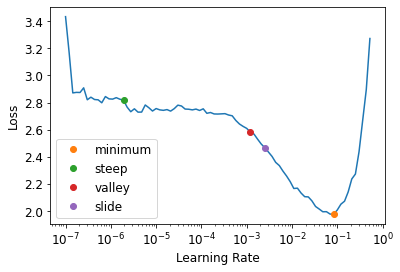

In [8]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [9]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	8.32e-03
Steepest point:	1.91e-06
Longest valley:	1.20e-03
Slide interval:	2.51e-03


In [10]:
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.793160,12.297396,0.600000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,5.163662,325.116852,0.216667,00:06


In [11]:
learn.fine_tune(1, base_lr=7e-4) 

epoch,train_loss,valid_loss,accuracy,time
0,2.964627,19.012056,0.200000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,2.561464,5.298337,0.300000,00:07


In [12]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(2, 7e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.680076,1.784858,0.250000,00:06
1,2.385559,1.420533,0.316667,00:06


SuggestedLRs(valley=0.0003981071640737355)

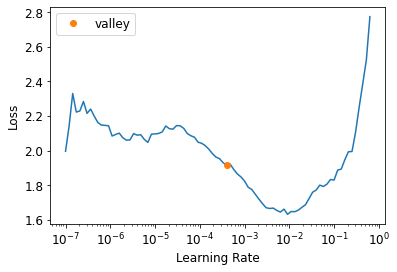

In [13]:
learn.unfreeze()
learn.lr_find()

In [14]:
learn.fit_one_cycle(4, lr_max=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.910285,1.414378,0.466667,00:07
1,1.608247,0.870097,0.666667,00:07
2,1.433610,0.647860,0.733333,00:07
3,1.268946,0.497588,0.800000,00:07


In [15]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(2, 7e-4)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(7e-5,7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.702822,1.849847,0.400000,00:06
1,2.408925,1.617017,0.416667,00:06


epoch,train_loss,valid_loss,accuracy,time
0,2.011993,1.362979,0.383333,00:07
1,1.610704,0.961791,0.750000,00:07
2,1.376714,2.421011,0.500000,00:07
3,1.286779,4.050406,0.550000,00:07
4,1.136801,0.678405,0.833333,00:07
5,1.010419,0.818827,0.850000,00:07
6,0.881508,0.353957,0.883333,00:07
7,0.777866,0.246740,0.933333,00:07
8,0.677369,0.206549,0.933333,00:07
9,0.615752,0.103002,0.966667,00:07


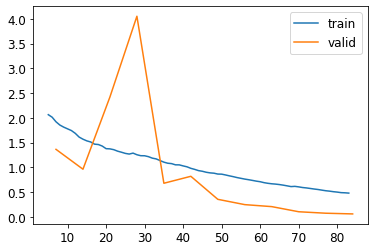

In [16]:
learn.recorder.plot_loss()

In [17]:
# batch size of 16
dls = digits.dataloaders(path, bs = 16)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(2, 7e-4)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(7e-5,7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.605719,1.557582,0.383333,00:06
1,2.305766,1.446892,0.300000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,1.852571,0.699592,0.766667,00:07
1,1.461868,0.181521,0.916667,00:07
2,1.442870,0.675718,0.866667,00:07
3,1.457930,0.813707,0.800000,00:07
4,1.333930,0.124830,0.950000,00:09
5,1.130696,0.198234,0.933333,00:08
6,0.974168,0.023759,0.983333,00:07
7,0.859216,0.158557,0.950000,00:07
8,0.732362,0.117730,0.950000,00:07
9,0.604848,0.040110,0.983333,00:07


In [18]:
# batch size of 64
dls = digits.dataloaders(path, bs = 64)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(2, 7e-4)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(7e-5,7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.779754,3.326381,0.183333,00:06
1,2.645109,2.534817,0.166667,00:06


epoch,train_loss,valid_loss,accuracy,time
0,2.312111,1.923061,0.200000,00:07
1,1.969213,1.074697,0.583333,00:07
2,1.655770,1.775448,0.483333,00:07
3,1.359479,1.261708,0.700000,00:07
4,1.292017,0.513883,0.850000,00:07
5,1.171439,2.330049,0.583333,00:07
6,1.078895,1.604462,0.683333,00:07
7,0.983267,0.205862,0.900000,00:07
8,0.897207,0.042743,0.983333,00:07
9,0.839379,0.019617,1.000000,00:07


In [19]:
#retraining model to batch size of 32
dls = digits.dataloaders(path, bs = 32)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(2, 7e-4)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(7e-5,7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.597916,2.245483,0.233333,00:06
1,2.331963,1.795117,0.300000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,1.765454,1.332248,0.566667,00:07
1,1.529161,0.964715,0.650000,00:07
2,1.412643,1.011822,0.650000,00:07
3,1.224566,4.082403,0.500000,00:07
4,1.121853,3.460768,0.583333,00:07
5,1.081177,0.717828,0.783333,00:07
6,0.972527,0.471672,0.833333,00:07
7,0.862905,0.094539,0.966667,00:07
8,0.768821,0.098567,0.950000,00:07
9,0.680371,0.076301,0.983333,00:07


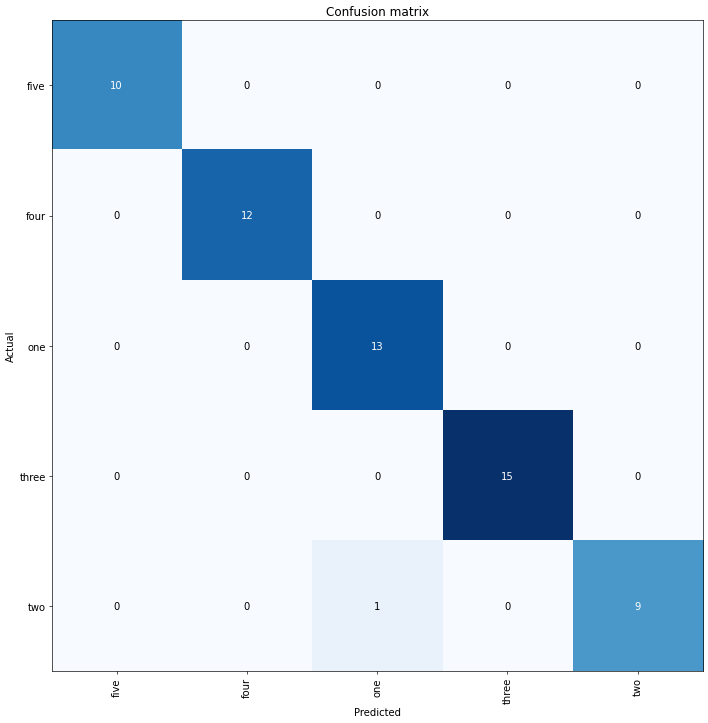

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=1)

[('two', 'one', 1)]

# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*I liked looking at my older assignments and figuring out what could've been done better.
I was confused about which method to choose; and I am not sure if I was supposed to keep the model training exactly the same as lab 3 or train the model according to the new results.*

